# Titanic Projesi Classification işlemi yapma

- Bu projede Titanic kazası sonrası insanların hayatta kalma durumları Classification yöntemi ile tahmin edilmiştir. Data Kaggle.com dan alınmıştır.

Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

<a href='https://www.kaggle.com/competitions/titanic/overview' target=_blank> Data dosyasını buradaki linkten indirebilirsiniz.

 # Gerekli Paketleri import Ediyoruz

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### import Data

In [2]:
df1 = pd.read_csv('ttest.csv')
df2 = pd.read_csv('ttrain.csv')

### EDA - Exploratory Data Analysis - Keşifsel Veri Analizi

In [3]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
df2.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df1.corr(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


In [12]:
df2.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
df1.shape

(418, 11)

In [14]:
df2.shape

(891, 12)

In [15]:
abs(df1.corr(numeric_only=True)['PassengerId']).sort_values(ascending=False)

PassengerId    1.000000
Parch          0.043080
Age            0.034102
Pclass         0.026751
Fare           0.008211
SibSp          0.003818
Name: PassengerId, dtype: float64

<Axes: >

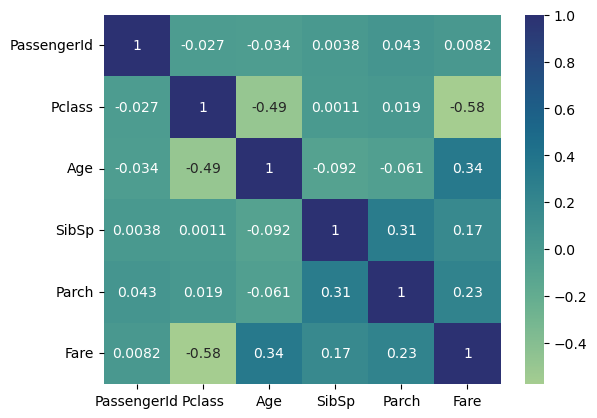

In [16]:
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='crest')

In [17]:
abs(df2.corr(numeric_only=True)['PassengerId']).sort_values(ascending=False)

PassengerId    1.000000
SibSp          0.057527
Age            0.036847
Pclass         0.035144
Fare           0.012658
Survived       0.005007
Parch          0.001652
Name: PassengerId, dtype: float64

<Axes: >

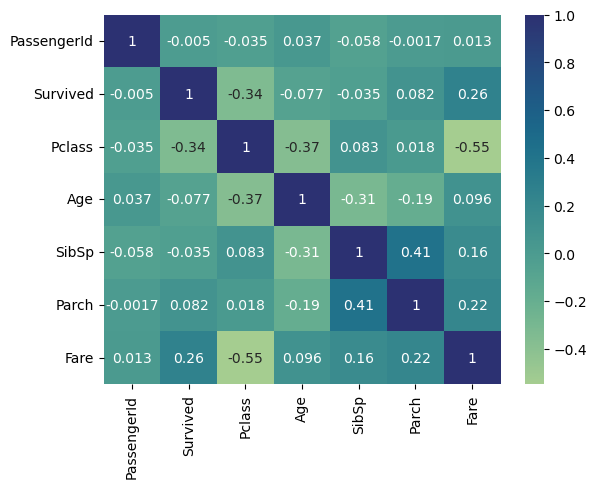

In [18]:
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='crest')

In [19]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
df1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### csv dosyaların birleştirme

In [22]:
df_combined = pd.concat([df2, df1], ignore_index=True)

In [23]:
df_combined.to_csv('birlesmis_dosya.csv', index=False)

In [24]:
df3=pd.read_csv('birlesmis_dosya.csv')

### Veri Temizleme

In [25]:
missing_percentage = df3.isnull().mean() * 100 # %de hesabı
columns_to_drop = missing_percentage[missing_percentage > 50].index  # %de 50den fazla boş olanları seçer.
df3 = df3.drop(columns=columns_to_drop)  # %de 50den fazla boş olanları siler.

In [26]:
df3.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

### Veri doldurma

In [27]:
df3['Fare'].fillna(df3['Fare'].mean(), inplace=True)  # veriyi ortalamayla doldurduk.
df3['Embarked'].fillna(df3['Embarked'].mode()[0], inplace=True)  #veriyi en sık kullanılan değerle doldurduk.

In [28]:
# Name sütunundan unvanları çıkarma
df3['Title'] = df3['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Unvanlara göre yaş doldurma
title_ages = df3.groupby('Title')['Age'].mean()


In [29]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return title_ages[row['Title']]
    else:
        return row['Age']

df3['Age'] = df3.apply(fill_age, axis=1)
df3['Age'] = df3['Age'].round().astype(int)

In [30]:
print(df3.isnull().sum())

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64


In [31]:
print(df3[['Name', 'Title', 'Age']].head(1))

                      Name Title  Age
0  Braund, Mr. Owen Harris    Mr   22


In [32]:
df3 = pd.get_dummies(df3, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

In [33]:
df3.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0.0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,5,0.0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [34]:
train_data = df3.iloc[:891]
test_data = df3.iloc[891:]

In [35]:
X_train = train_data.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y_train = train_data['Survived'].astype(int)
X_test = test_data.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])

In [36]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [37]:
l = LogisticRegression()
l.fit(x_train, y_train)

LogisticRegression()

In [38]:
ltahmin=l.predict(x_val)

In [39]:
accuracy_score(ltahmin,y_val)

0.7988826815642458

In [40]:
d=DecisionTreeClassifier()

In [41]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
dtahmin=d.predict(x_val)

In [43]:
accuracy_score(dtahmin,y_val)

0.776536312849162

In [44]:
r=RandomForestClassifier()

In [45]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
rtahmin=r.predict(x_val)

In [47]:
accuracy_score(rtahmin,y_val)

0.8324022346368715

In [48]:
h=GradientBoostingClassifier()

In [49]:
h.fit(x_train,y_train)

GradientBoostingClassifier()

In [50]:
htahmin=h.predict(x_val)

In [51]:
accuracy_score(htahmin,y_val)

0.8324022346368715

In [52]:
k=KNeighborsClassifier()

In [53]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
ktahmin=k.predict(x_val)

In [55]:
accuracy_score(htahmin,y_val)

0.8324022346368715

In [56]:
y_pred = h.predict(X_test)
test_data['Survived'] = y_pred
submission = test_data[['PassengerId', 'Survived']]
submission.to_csv('submission.csv', index=False)